<a href="https://colab.research.google.com/github/AKashkv02/Telecom-Customer-Churn-Analysis/blob/main/Telecom_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telcom customer churn prediction








Dataset Info: Sample Data Set containing Telco customer data and showing customers left last month

In [56]:
#Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [57]:
df=pd.read_csv('https://raw.githubusercontent.com/pik1989/MLProject-ChurnPrediction/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df.shape

(7043, 21)

In [59]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [60]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [61]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


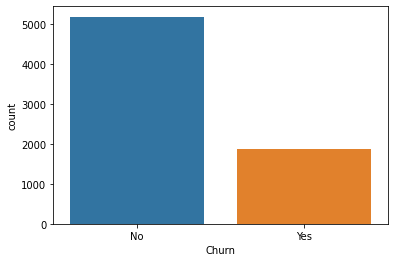

In [62]:
sns.countplot(df['Churn'])

In [63]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [64]:
df['Churn'].value_counts()*100/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64



*   Data is highly imbalanced, ratio = 73:27
*   So we analyse the data with other 
    features while taking the target values separately to get some insights











In [65]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



*   Here , we don't have any missin data



#Data Cleaning
1. Create a copy of base data for manupulation & processing





In [66]:
df2=df.copy()

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [67]:
df2['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df2['TotalCharges'].dtype

dtype('float64')

In [68]:
df2.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [69]:
df2[df2['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [70]:
#Removing missing values
df2.dropna(how='any',inplace=True)
df2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [71]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [72]:
df2['tenure'].max()

72

In [73]:
# Group the tenure in bins of 12 months
labels=['{} - {}'.format(i,i+11) for i in range(1,72,12)]
df2['tenure_group']=pd.cut(df2['tenure'],range(1,80,12),right=False,labels=labels)
df2['tenure_group'].value_counts().sort_values()


37 - 48     762
25 - 36     832
49 - 60     832
13 - 24    1024
61 - 72    1407
1 - 12     2175
Name: tenure_group, dtype: int64

6. Remove columns which are not required for processing

In [74]:
df3=df2.drop(columns=['customerID','tenure'])
df3.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [75]:
df3.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

#Data Exploration
1. Plot distibution of individual predictors by churn

##Univariate Analysis

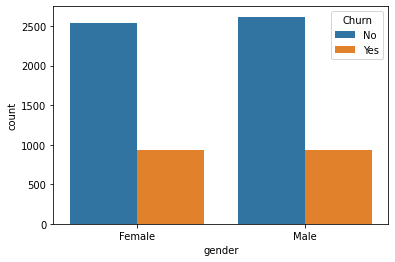

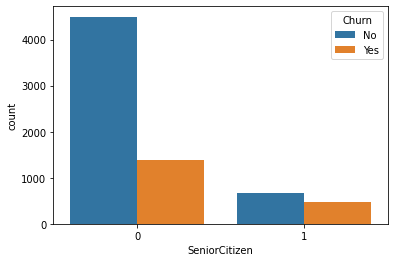

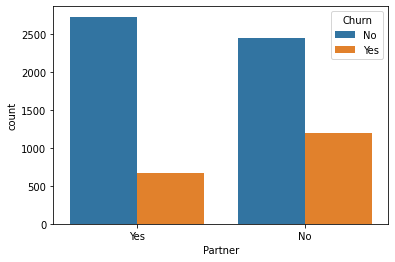

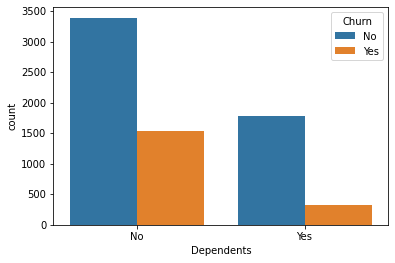

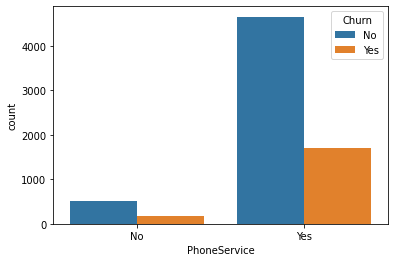

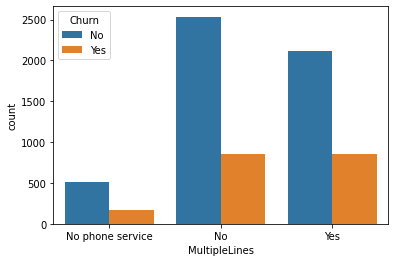

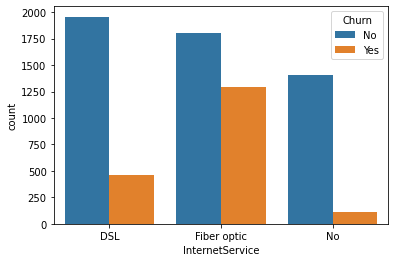

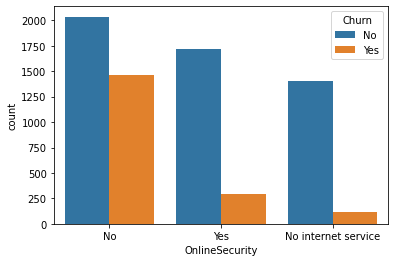

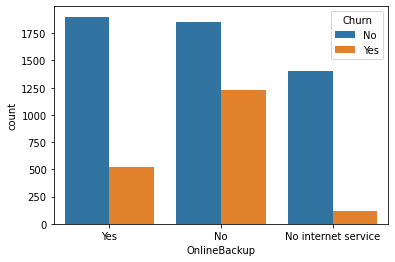

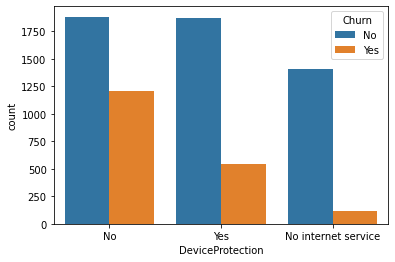

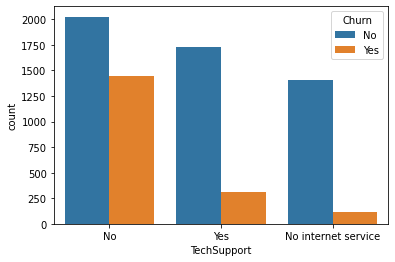

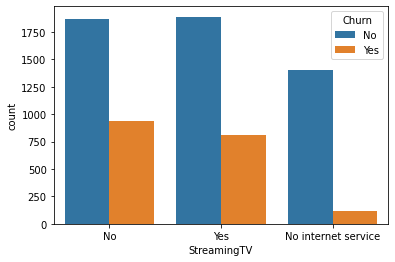

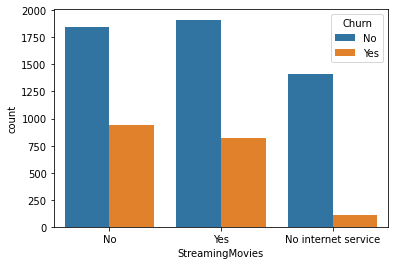

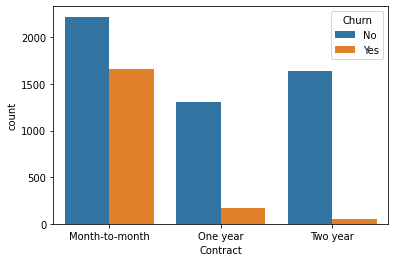

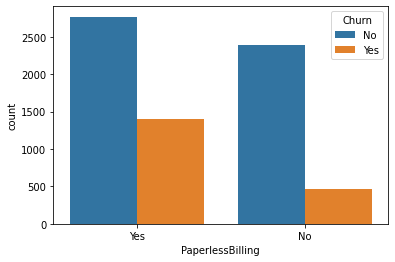

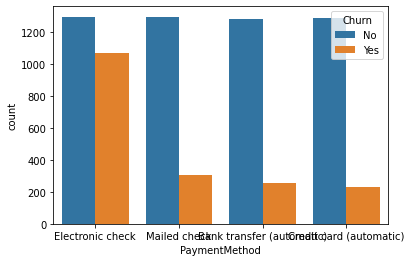

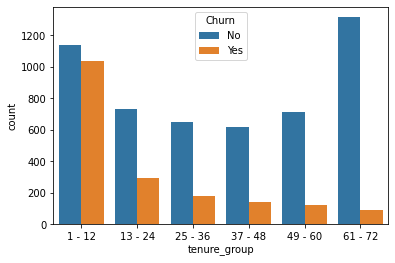

In [76]:
for i,predictor in enumerate(df3.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
  plt.figure(i)
  
  sns.countplot(x=predictor,hue='Churn',data=df3)

2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [77]:
df3['Churn']=np.where(df3['Churn']=='Yes',1,0)
df3.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


3. Convert all the categorical variables into dummy variables

In [78]:
df3=pd.get_dummies(df3)
df3.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


9. Relationship between Monthly Charges and Total Charges

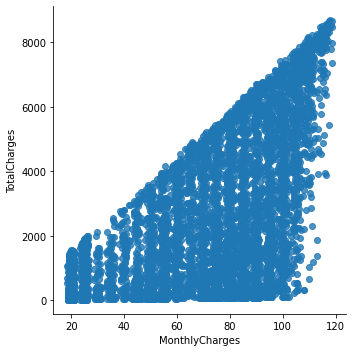

In [79]:
sns.lmplot( x='MonthlyCharges', y='TotalCharges',data=df3 ,fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

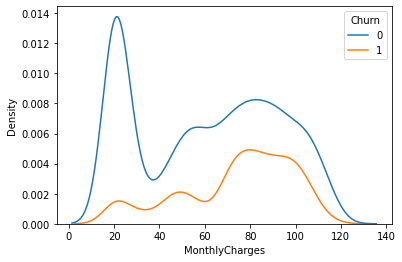

In [80]:
sns.kdeplot(df3['MonthlyCharges'],hue=df3['Churn'])

Insight: Churn is high when Monthly Charges ar high

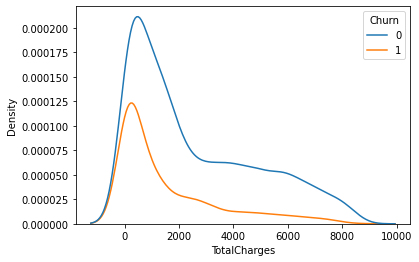

In [81]:
sns.kdeplot(df3['TotalCharges'],hue=df3['Churn'])

Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

11. Build a corelation of all predictors with 'Churn'

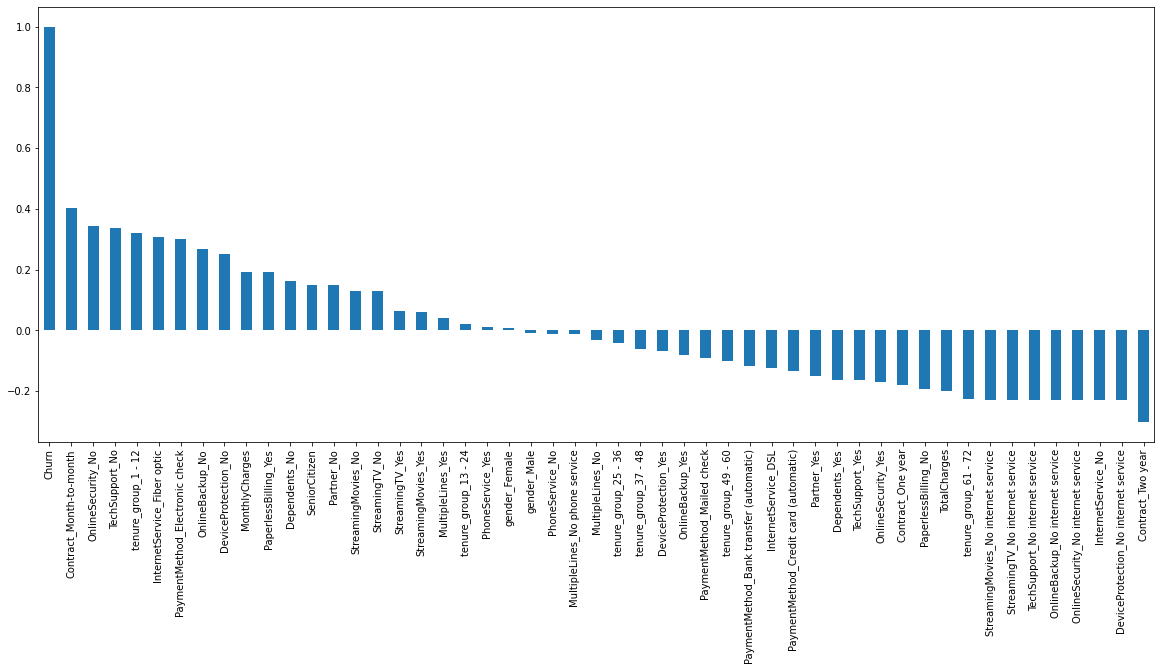

In [82]:
plt.figure(figsize=(20,8))
df3.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

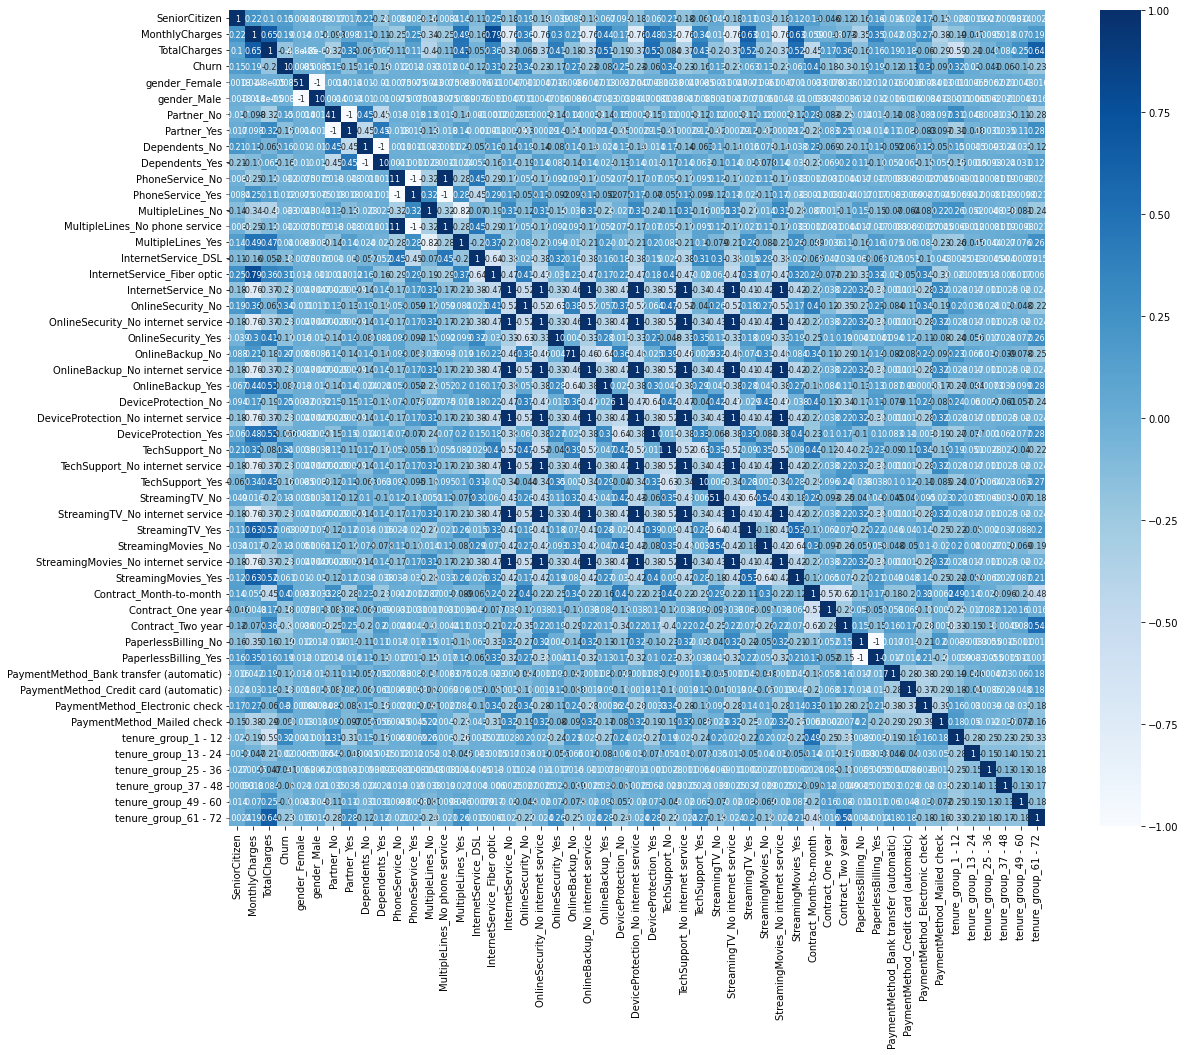

In [83]:
plt.figure(figsize=(20,15))
sns.heatmap(df3.corr(),cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

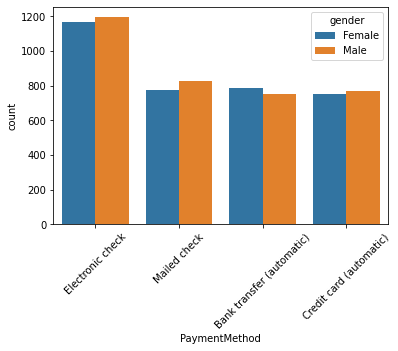

In [84]:
sns.countplot(x='PaymentMethod',hue='gender',data=df2)
plt.xticks(rotation=45)

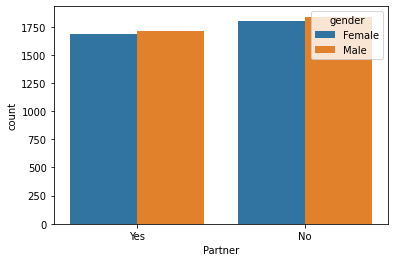

In [85]:
sns.countplot(x='Partner',hue='gender',data=df2)

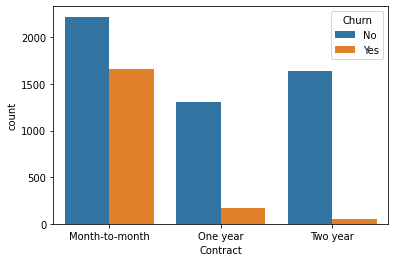

In [86]:
sns.countplot(x='Contract',hue='Churn',data=df2)

#Model Building

In [87]:
df3.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [88]:
x=df3.drop('Churn',axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [89]:
y=df3['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

##Splitting the data into tain and test 

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


#Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier 
model_dt=DecisionTreeClassifier(criterion='gini',max_depth=8,ccp_alpha=0.01)


In [92]:
'''criterion
splitter
max_features
rando_state
model_dt=DecisionTreeClassifier(criterion='gini',max_depth=4,ccp_alpha=0.01,random_state=30)''' 


"criterion\nsplitter\nmax_features\nrando_state\nmodel_dt=DecisionTreeClassifier(criterion='gini',max_depth=4,ccp_alpha=0.01,random_state=30)"

In [93]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=8)

In [94]:
model_dt.score(X_test,y_test)

0.7896233120113717

In [95]:
model_dt.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [96]:
model_dt.predict_proba(X_test)

array([[0.71728127, 0.28271873],
       [0.71728127, 0.28271873],
       [0.93074792, 0.06925208],
       ...,
       [0.93074792, 0.06925208],
       [0.93074792, 0.06925208],
       [0.93074792, 0.06925208]])

In [97]:
pred=model_dt.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred,labels=[0,1])

array([[962,  76],
       [220, 149]])

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7896233120113717

In [100]:
from sklearn.metrics import precision_score
precision_score(y_test,pred)

0.6622222222222223

In [101]:
from sklearn.metrics import recall_score
recall_score(y_test,pred)

0.4037940379403794

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1038
           1       0.66      0.40      0.50       369

    accuracy                           0.79      1407
   macro avg       0.74      0.67      0.68      1407
weighted avg       0.77      0.79      0.77      1407



In [103]:
#Which is the most important feature
feature_names=x.columns
feature_names

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessB

In [104]:
feature_importance=pd.DataFrame(model_dt.feature_importances_,index=feature_names).sort_values(by=0,ascending=False)
feature_importance

,0
Contract_Month-to-month,0.670905
InternetService_Fiber optic,0.197011
TotalCharges,0.132084
SeniorCitizen,0.000000
Contract_Two year,0.000000
TechSupport_Yes,0.000000
StreamingTV_No,0.000000
StreamingTV_No internet service,0.000000
StreamingTV_Yes,0.000000
StreamingMovies_No,0.000000


In [105]:
features=list(feature_importance[feature_importance[0]>0].index)
features

['Contract_Month-to-month', 'InternetService_Fiber optic', 'TotalCharges']

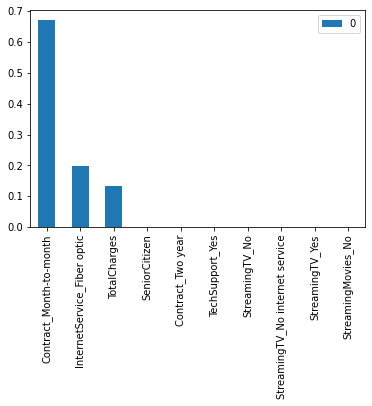

In [106]:
feature_importance.head(10).plot(kind='bar')

[Text(0.3333333333333333, 0.875, 'Contract_Month-to-month <= 0.5\ngini = 0.391\nsamples = 5625\nvalue = [4125, 1500]\nclass = No churn'),
 Text(0.16666666666666666, 0.625, 'gini = 0.129\nsamples = 2527\nvalue = [2352, 175]\nclass = No churn'),
 Text(0.5, 0.625, 'InternetService_Fiber optic <= 0.5\ngini = 0.49\nsamples = 3098\nvalue = [1773, 1325]\nclass = No churn'),
 Text(0.3333333333333333, 0.375, 'gini = 0.406\nsamples = 1383\nvalue = [992, 391]\nclass = No churn'),
 Text(0.6666666666666666, 0.375, 'TotalCharges <= 1556.25\ngini = 0.496\nsamples = 1715\nvalue = [781, 934]\nclass = churn'),
 Text(0.5, 0.125, 'gini = 0.435\nsamples = 904\nvalue = [289, 615]\nclass = churn'),
 Text(0.8333333333333334, 0.125, 'gini = 0.477\nsamples = 811\nvalue = [492, 319]\nclass = No churn')]

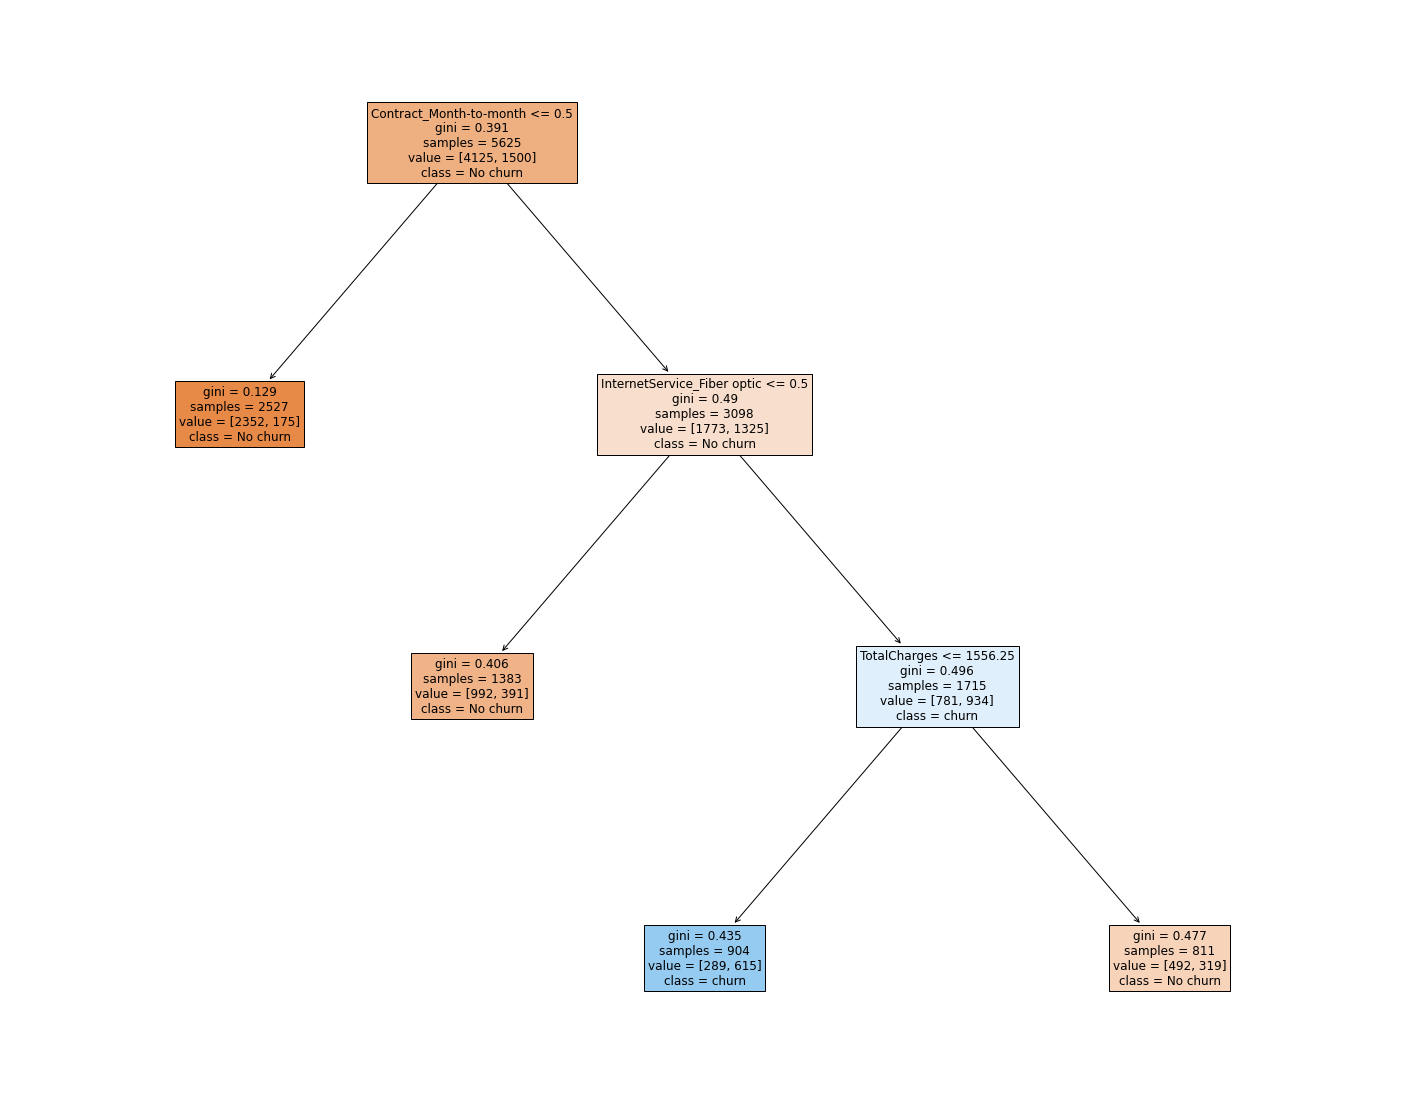

In [107]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(model_dt,feature_names=feature_names,
               class_names={0:'No churn',1: 'churn'},
               filled=True,
               fontsize=12)


As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

Combine SMOTE with Edited Nearest Neighbor (ENN) using Python to balance your dataset

here I create two models, where the first one is without using any imbalance data handling, while the other is using the SMOTE-ENN method to balance the data.




#SMOTEENN decision classifier

In [108]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
X_resampled,y_resampled=sm.fit_resample(x,y)


In [109]:
xs_train,xs_test,ys_train,ys_test=train_test_split(X_resampled,y_resampled,test_size=0.2)                      

In [110]:
model_dt_smote=DecisionTreeClassifier(criterion='entropy',random_state=100,
                                      max_depth=6,
                                      min_samples_leaf=8)

In [111]:
model_dt_smote.fit(xs_train,ys_train)
ys_predict=model_dt_smote.predict(xs_test)
model_score=model_dt_smote.score(xs_test,ys_test)
print(model_score)
print(classification_report(ys_test,ys_predict))

0.9320722269991402
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       502
           1       0.95      0.93      0.94       661

    accuracy                           0.93      1163
   macro avg       0.93      0.93      0.93      1163
weighted avg       0.93      0.93      0.93      1163



In [112]:
confusion_matrix(ys_test,ys_predict)

array([[470,  32],
       [ 47, 614]])

In [125]:
accuracy_score(ys_test,ys_predict)

0.9320722269991402

Now we can see quite better results, i.e. Accuracy: 93 %, and a very good recall, precision & f1 score for minority class.

#Random Forest Classifier

In [128]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100)

In [129]:
model_rf.fit(X_train,y_train)
y_pred_rf=model_rf.predict(X_test)

In [130]:
model_rf.score(X_test,y_test)

0.7810945273631841

In [116]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1038
           1       0.61      0.46      0.53       369

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [131]:
accuracy_score(y_test,y_pred_rf)

0.7810945273631841

#SMOTEENN random forest classifier

In [117]:
sm1=SMOTEENN()
x_res,y_res=sm1.fit_resample(x,y)

In [118]:
xs_train2,xs_test2,ys_train2,ys_test2=train_test_split(x_res,y_res,test_size=0.2)


In [119]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xs_train2,ys_train2)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [120]:
y_pred_smote2=model_rf_smote.predict(xs_test2)

In [121]:
model_rf_smote.score(xs_test2,ys_test2)

0.947996589940324

In [122]:
print(classification_report(ys_test2,y_pred_smote2))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       525
           1       0.94      0.97      0.95       648

    accuracy                           0.95      1173
   macro avg       0.95      0.95      0.95      1173
weighted avg       0.95      0.95      0.95      1173



In [123]:
confusion_matrix(ys_test2,y_pred_smote2)

array([[482,  43],
       [ 18, 630]])

In [127]:
accuracy_score(ys_test2,y_pred_smote2)

0.947996589940324

With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

#Conclusion:



Without using SMOTE-ENN to balance the data, the model performance that is produced is as follows.

Decision tree--> 79% accuracy
Random Forest --> 78% accuary


using the SMOTE-ENN method to balance the dataset that used in classification modeling, thus increasing the model performance

Decision tree--> 93% accuracy
Random Forest --> 94.7% accuary


